In [1]:
import numpy as np

# Example: Load and inspect anno.npz
data = np.load("../data/sample/r4_new_f/anno.npz")
print(data.files)  # Lists all arrays inside the .npz file
for k in data.files:
    print(k, data[k].shape)

['trajs_2d', 'trajs_3d', 'valids', 'visibs', 'intrinsics', 'extrinsics']
trajs_2d (849, 11721, 2)
trajs_3d (849, 11721, 3)
valids (849, 11721)
visibs (849, 11721)
intrinsics (849, 3, 3)
extrinsics (849, 4, 4)


In [2]:
for i in range(2):
    print(data["trajs_2d"][0][i])
for i in range(2):
    print(data["trajs_3d"][0][i])
for i in range(2):
    print(data["valids"][0][i])
for i in range(2):
    print(data["visibs"][0][i])
for i in range(2):
    print(data["intrinsics"][0][i])
for i in range(2):
    print(data["extrinsics"][0][i])

import cv2

img = cv2.imread('../data/sample/r4_new_f/rgbs/rgb_00000.jpg')
print(img.shape)  # (height, width, channels)

[849.5 141.5]
[851.   141.25]
[-1.6289062  1.3346355 -1.6835938]
[-1.6328125  1.3359375 -1.6914062]
True
True
True
True
[576.   0. 480.]
[  0. 576. 270.]
[-7.3583984e-01 -5.9604645e-08 -6.7724609e-01  8.9903676e-07]
[ 0.23535156 -0.9375     -0.25561523  0.390625  ]
(540, 960, 3)


In [12]:
# ['trajs_2d', 'trajs_3d', 'valids', 'visibs', 'intrinsics', 'extrinsics']
# trajs_2d (849, 11721, 2)
# trajs_3d (849, 11721, 3)
# valids (849, 11721)
# visibs (849, 11721)
# intrinsics (849, 3, 3)
# extrinsics (849, 4, 4)

import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Load trajectories
data = np.load("../data/sample/r4_new_f/anno.npz")
trajs_2d = data['trajs_2d']
valids = data['valids']

# Open the video
video_path = "../data/sample/r4_new_f.mp4"
cap = cv2.VideoCapture(video_path)

frame_idx = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert BGR to RGB for matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Extract valid points for the current frame
    points = trajs_2d[frame_idx, :, :]
    valid_mask = valids[frame_idx, :]
    points_valid = points[valid_mask]

    # Clear previous output
    clear_output(wait=True)

    # Plot the frame and points
    plt.figure(figsize=(12, 8))
    plt.imshow(frame_rgb)
    plt.scatter(points_valid[:, 0], points_valid[:, 1], color='red', s=5, label='Trajectories')
    plt.xlim([0, frame.shape[1]])
    plt.ylim([frame.shape[0], 0])  # Invert y-axis for correct orientation
    plt.title(f"Frame {frame_idx}")
    plt.legend()
    plt.axis('off')
    plt.show()

    # Wait for 2 seconds
    time.sleep(0.1)

    frame_idx += 1

cap.release()

KeyboardInterrupt: 

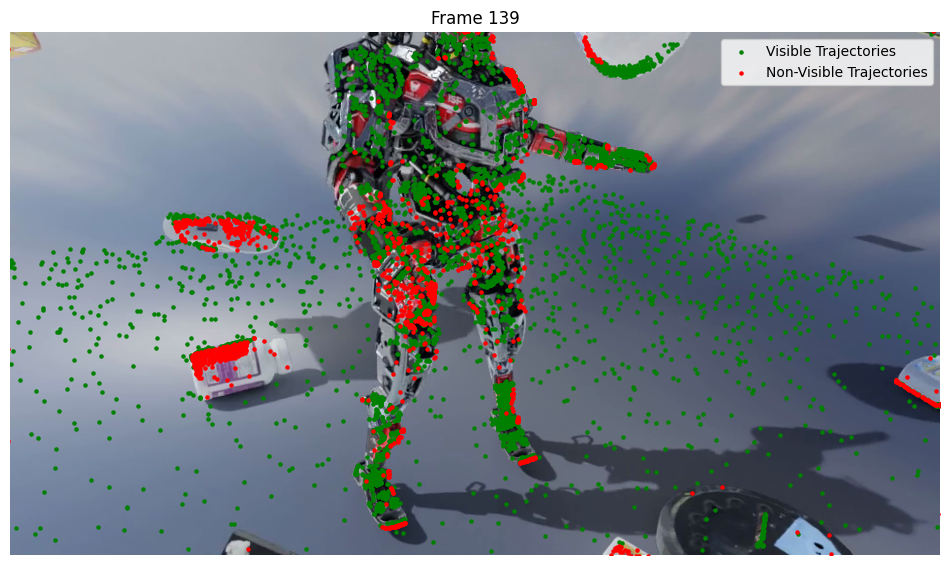

KeyboardInterrupt: 

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Load trajectories
data = np.load("../data/sample/r4_new_f/anno.npz")
trajs_2d = data['trajs_2d']
valids = data['valids']
visibs = data['visibs']

# Open the video
video_path = "../data/sample/r4_new_f.mp4"
cap = cv2.VideoCapture(video_path)

frame_idx = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert BGR to RGB for matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Extract valid points for the current frame
    points = trajs_2d[frame_idx, :, :]
    valid_mask = valids[frame_idx, :]
    visib_mask = visibs[frame_idx, :]

    points_valid = points[valid_mask]
    visibs_valid = visib_mask[valid_mask]

    # Clear previous output
    clear_output(wait=True)

    # Plot the frame and points
    plt.figure(figsize=(12, 8))
    plt.imshow(frame_rgb)
    plt.scatter(points_valid[visibs_valid, 0], points_valid[visibs_valid, 1], color='green', s=5, label='Visible Trajectories')
    plt.scatter(points_valid[~visibs_valid, 0], points_valid[~visibs_valid, 1], color='red', s=5, label='Non-Visible Trajectories')
    plt.xlim([0, frame.shape[1]])
    plt.ylim([frame.shape[0], 0])  # Invert y-axis for correct orientation
    plt.title(f"Frame {frame_idx}")
    plt.legend()
    plt.axis('off')
    plt.show()

    # Wait for 2 seconds
    time.sleep(0.1)

    frame_idx += 1

cap.release()

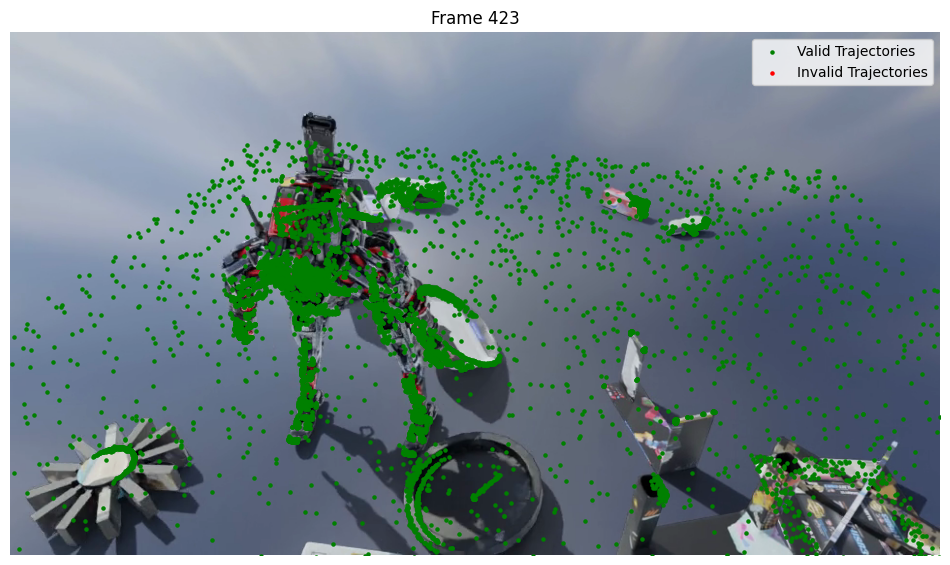

KeyboardInterrupt: 

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Load trajectories
data = np.load("../data/sample/r4_new_f/anno.npz")
trajs_2d = data['trajs_2d']
valids = data['valids']
visibs = data['visibs']

# Open the video
video_path = "../data/sample/r4_new_f.mp4"
cap = cv2.VideoCapture(video_path)

frame_idx = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert BGR to RGB for matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Extract valid points for the current frame
    points = trajs_2d[frame_idx, :, :]
    valid_mask = valids[frame_idx, :]

    points_valid = points[valid_mask]

    # Clear previous output
    clear_output(wait=True)

    # Plot the frame and points
    plt.figure(figsize=(12, 8))
    plt.imshow(frame_rgb)
    plt.scatter(points_valid[:, 0], points_valid[:, 1], color='green', s=5, label='Valid Trajectories')
    plt.scatter(points[~valid_mask, 0], points[~valid_mask, 1], color='red', s=5, label='Invalid Trajectories')
    plt.xlim([0, frame.shape[1]])
    plt.ylim([frame.shape[0], 0])  # Invert y-axis for correct orientation
    plt.title(f"Frame {frame_idx}")
    plt.legend()
    plt.axis('off')
    plt.show()

    # Wait for 2 seconds
    time.sleep(0.1)

    frame_idx += 1

cap.release()


In [16]:
import rerun as rr
import numpy as np
import time

# Load trajectories
data = np.load("../data/sample/r4_new_f/anno.npz")
trajs_3d = data['trajs_3d']
valids = data['valids']

# Initialize Rerun
rr.init("rerun_3d_visualization_running", spawn=True)

# Loop through frames
for frame_idx in range(trajs_3d.shape[0]):
    # Extract 3D points and valid mask for the current frame
    points_3d = trajs_3d[frame_idx, :, :]
    valid_mask = valids[frame_idx, :]

    # Filter valid 3D points
    points_3d_valid = points_3d[valid_mask]

    # Log the 3D points for the current frame
    rr.log(
        "frame_3d_points",
        rr.Points3D(
            points_3d_valid,
            radii=0.01,  # Adjust radius for visualization
            colors=np.array([[0, 255, 0]] * len(points_3d_valid), dtype=np.uint8),  # Green for valid points
        ),
    )

    # Sleep to simulate real-time frame update
    time.sleep(0.1)

# Close Rerun logging
rr.shutdown()

[2025-01-23T07:19:09Z INFO  re_sdk::spawn] A process is already listening at this address. Assuming it's a Rerun Viewer. addr=0.0.0.0:9876
[2025-01-23T07:19:09Z INFO  re_sdk_comms::server] New SDK client connected from: 127.0.0.1:57508


KeyboardInterrupt: 

In [18]:
import rerun as rr
import numpy as np
import time

# Load trajectories
data = np.load("../data/sample/r4_new_f/anno.npz")
trajs_3d = data['trajs_3d']
valids = data['valids']
visibs = data['visibs']

# Initialize Rerun
rr.init("rerun_3d_visualization_running_new", spawn=True)

# Loop through frames
for frame_idx in range(trajs_3d.shape[0]):
    # Extract 3D points and valid mask for the current frame
    points_3d = trajs_3d[frame_idx, :, :]
    valid_mask = valids[frame_idx, :]
    visib_mask = visibs[frame_idx, :]

    # Filter valid 3D points and corresponding visibility
    points_3d_valid = points_3d[valid_mask]
    visibs_valid = visib_mask[valid_mask]

    # Assign colors based on visibility
    colors = np.array(
        [[0, 255, 0] if visib else [255, 0, 0] for visib in visibs_valid],  # Green if visible, red if not
        dtype=np.uint8
    )

    # Log the 3D points for the current frame
    rr.log(
        "frame_3d_points",
        rr.Points3D(
            points_3d_valid,
            radii=0.01,  # Adjust radius for visualization
            colors=colors,  # Color based on visibility
        ),
    )

    # Sleep to simulate real-time frame update
    time.sleep(0.1)

# Close Rerun logging
rr.shutdown()

[2025-01-23T07:39:09Z INFO  re_sdk::spawn] A process is already listening at this address. Assuming it's a Rerun Viewer. addr=0.0.0.0:9876
[2025-01-23T07:39:09Z INFO  re_sdk_comms::server] New SDK client connected from: 127.0.0.1:57896


KeyboardInterrupt: 

In [19]:
import rerun as rr
import numpy as np
import time

# Load trajectories
data = np.load("../data/sample/r4_new_f/anno.npz")
trajs_3d = data['trajs_3d']
valids = data['valids']

# Initialize Rerun
rr.init("rerun_3d_visualization_running_valids", spawn=True)

# Loop through frames
for frame_idx in range(trajs_3d.shape[0]):
    # Extract 3D points and valid mask for the current frame
    points_3d = trajs_3d[frame_idx, :, :]
    valid_mask = valids[frame_idx, :]

    # Assign colors based on validity
    colors = np.array(
        [[0, 255, 0] if valid else [255, 0, 0] for valid in valid_mask],  # Green if valid, red if not
        dtype=np.uint8
    )

    # Log the 3D points for the current frame
    rr.log(
        "frame_3d_points",
        rr.Points3D(
            points_3d,
            radii=0.01,  # Adjust radius for visualization
            colors=colors,  # Color based on validity
        ),
    )

    # Sleep to simulate real-time frame update
    time.sleep(0.1)

# Close Rerun logging
rr.shutdown()

[2025-01-23T07:40:31Z INFO  re_sdk::spawn] A process is already listening at this address. Assuming it's a Rerun Viewer. addr=0.0.0.0:9876
[2025-01-23T07:40:31Z INFO  re_sdk_comms::server] New SDK client connected from: 127.0.0.1:57921


KeyboardInterrupt: 

In [2]:
import numpy as np

flow = np.load("data/tartanair/test/Easy/P001/flow/000000_000001_flow.npy")
mask = np.load("data/tartanair/test/Easy/P001/flow/000000_000001_mask.npy")

flow.shape, mask.shape

((480, 640, 2), (480, 640))